In [1]:
%load_ext autoreload
%autoreload 1

%aimport utils
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import os
from IPython.display import HTML, display

## Get Raw AQR data

In [2]:
countries = ['USA', 'Europe', 'JPN']

for country in countries:
    data = utils.load_aqr_data(country).dropna()

    display(HTML('<h3>%s</h3>' % country))
    display(data.head(5))

,QUA,MKT,SMB,HMLFF,HMLDE,UMD,RF
DATE,,,,,,,
1957-07-01,-0.001566,0.001784,-0.002166,0.001984,0.001491,0.000651,0.000144
1957-07-02,-0.000484,0.008514,-0.005030,-0.004436,-0.004498,0.002705,0.000144
1957-07-03,0.000869,0.007938,-0.001245,-0.003676,-0.003696,0.002294,0.000144
1957-07-04,0.000000,-0.000144,0.000000,0.000000,0.000000,0.000000,0.000144
1957-07-05,0.001975,0.007755,-0.000769,-0.002781,-0.002389,-0.001137,0.000144


,QUA,MKT,SMB,HMLFF,HMLDE,UMD,RF
DATE,,,,,,,
1993-07-01,-0.003981,0.004999,0.001588,0.002191,0.002730,0.001195,0.000121
1993-07-02,0.002014,-0.004735,0.006415,-0.002877,-0.003827,-0.000179,0.000121
1993-07-05,0.001602,-0.002980,0.005062,0.000958,0.001156,0.000875,0.000121
1993-07-06,0.002424,0.001398,-0.000956,-0.000821,-0.000623,0.000512,0.000121
1993-07-07,0.003516,-0.005663,-0.000074,0.004866,0.004425,-0.001196,0.000121


,QUA,MKT,SMB,HMLFF,HMLDE,UMD,RF
DATE,,,,,,,
1993-07-01,-0.000611,0.005474,-0.006782,0.003491,0.002053,-0.001152,0.000121
1993-07-02,0.000788,-0.018723,0.004815,0.000458,0.000684,-0.000814,0.000121
1993-07-05,-0.000447,-0.004026,-0.002805,0.000572,0.002652,0.001333,0.000121
1993-07-06,-0.003096,0.012040,-0.002182,-0.001314,-0.001341,0.000535,0.000121
1993-07-07,0.000944,-0.001786,0.001592,-0.001653,-0.000175,-0.002970,0.000121


## Construct Combined Portfolio

We picked factors from Quality (`QUA`), Momentum (`UMD`), Value (`HMLFF`), and Size (`SMB`)

1. Equal Weighted (0.25 * 4)
2. Mainly Weighted On One of Them (0.4 vs. 0.2*3)
3. Heavily Weighted On One of Them (0.7 vs. 0.1*3)

In [3]:
assets = ['QUA', 'SMB', 'HMLFF', 'UMD']
main_weights = [0.7]
prefix_names = ['main']

In [4]:
portfolios = {}
for country in countries:
    data = utils.load_aqr_data(country).dropna()
    display(HTML('<h3>%s</h3>' % country))
    portfolios[country] = utils.build_portfolio(data, assets, main_weights, prefix_names, include_mkt=True)
    display(portfolios[country].head(3))

,equal_weights,main_QUA,main_SMB,main_HMLFF,main_UMD,MKT_MKT
DATE,,,,,,
1957-07-01,-0.000274,-0.001061,-0.001436,0.001158,0.000325,0.001784
1957-07-02,-0.001811,-0.000846,-0.003687,-0.003316,0.001147,0.008514
1957-07-03,-0.000440,0.000411,-0.000910,-0.002429,0.001302,0.007938


,equal_weights,main_QUA,main_SMB,main_HMLFF,main_UMD,MKT_MKT
DATE,,,,,,
1993-07-01,0.000248,-0.002414,0.001067,0.001444,0.000822,0.004999
1993-07-02,0.001343,0.001662,0.004412,-0.001395,0.000291,-0.004735
1993-07-05,0.002124,0.001639,0.003801,0.001236,0.001184,-0.002980


,equal_weights,main_QUA,main_SMB,main_HMLFF,main_UMD,MKT_MKT
DATE,,,,,,
1993-07-01,-0.001264,-0.000761,-0.004618,0.001803,-0.001099,0.005474
1993-07-02,0.001312,0.000886,0.003403,0.000680,-0.000115,-0.018723
1993-07-05,-0.000337,-0.000381,-0.001854,0.000257,0.000732,-0.004026


## Check Each Portfolio's Performance

In [5]:
returns = np.log(portfolios['USA'] + 1).cumsum()
returns = returns.reset_index().melt(
    id_vars='DATE',
    var_name='Portfolio', value_name='Log Cum Ret')
returns['factor'] = returns['Portfolio'].str.split('_').str[1]
returns.loc[returns['factor'] == 'weights', 'factor'] = 'equal'
returns['weight'] = returns['Portfolio'].str.split('_').str[0]
returns.tail(3)

,DATE,Portfolio,Log Cum Ret,factor,weight
96411,2019-01-29,MKT_MKT,3.069479,MKT,MKT
96412,2019-01-30,MKT_MKT,3.083752,MKT,MKT
96413,2019-01-31,MKT_MKT,3.092074,MKT,MKT


In [6]:
# Save the plot separately
plot_location = os.path.join(os.getcwd(), '..', 'Plots', 'Factor_Portfolio')

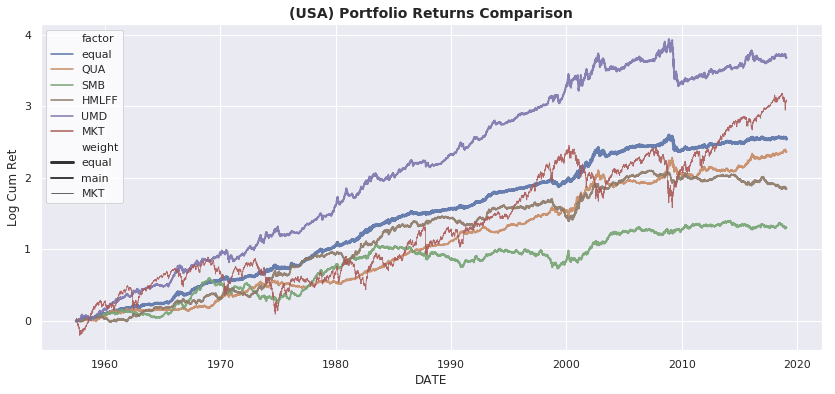

In [7]:
country = 'USA'
fig, ax = mpl.pyplot.subplots(1,1,figsize=(14,6))

ax = utils.plot_log_cum_returns(portfolios[country])
ax.set_title('(%s) Portfolio Returns Comparison' % country, fontsize=14, fontweight=700)
fig.savefig(os.path.join(plot_location, 'portfolio_cumret_%s.pdf' % country),
            bbox_inches='tight')

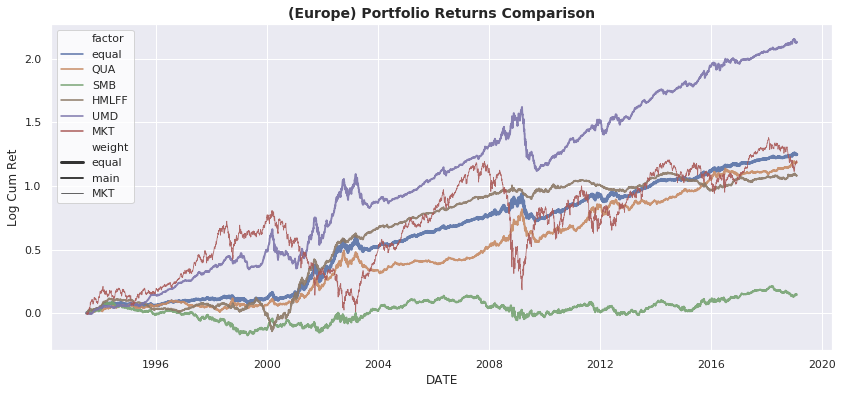

In [8]:
country = 'Europe'
fig, ax = mpl.pyplot.subplots(1,1,figsize=(14,6))

ax = utils.plot_log_cum_returns(portfolios[country])
ax.set_title('(%s) Portfolio Returns Comparison' % country, fontsize=14, fontweight=700)
fig.savefig(os.path.join(plot_location, 'portfolio_cumret_%s.pdf' % country),
            bbox_inches='tight')

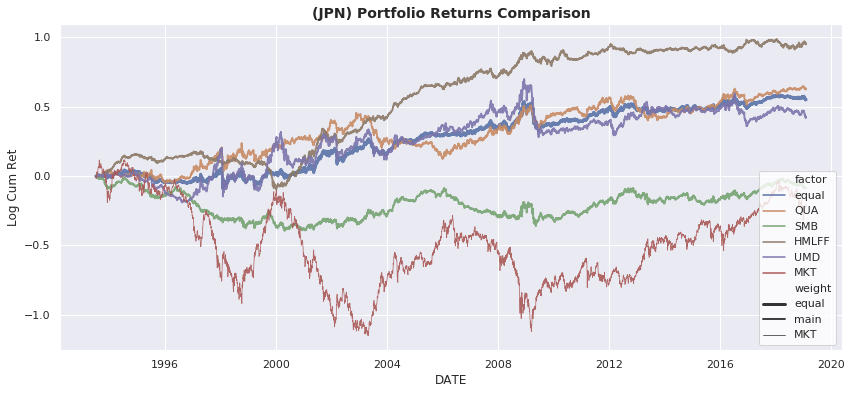

In [9]:
country = 'JPN'
fig, ax = mpl.pyplot.subplots(1,1,figsize=(14,6))

ax = utils.plot_log_cum_returns(portfolios[country])
ax.set_title('(%s) Portfolio Returns Comparison' % country, fontsize=14, fontweight=700)
fig.savefig(os.path.join(plot_location, 'portfolio_cumret_%s.pdf' % country),
            bbox_inches='tight')